In [1]:
import torch
import math
import matplotlib.pyplot as plt

import Modules
import Sequential
import Optimizer
from helpers import generate_disc_set, plot_data, train_model_SGD

torch.set_grad_enabled(False)

data, target, data_test, target_test = generate_disc_set(nb_sample=1000, show_data=True)

<Figure size 600x600 with 1 Axes>

0 train_loss 649.50 test_error 55.00%


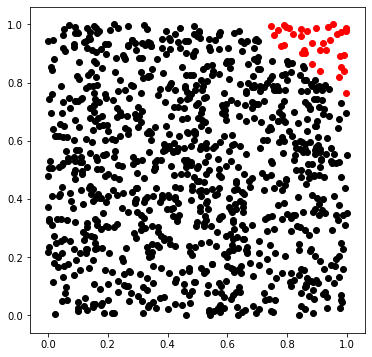

50 train_loss 467.07 test_error 31.20%


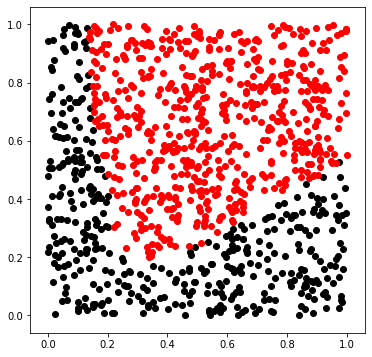

100 train_loss 430.44 test_error 26.80%


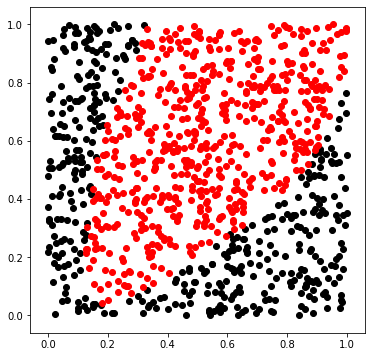

150 train_loss 381.43 test_error 26.20%


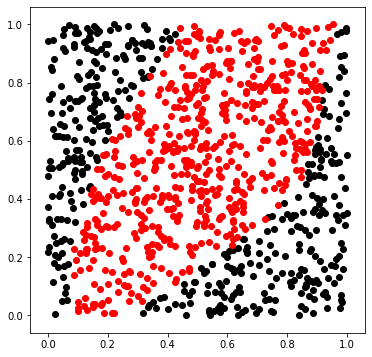

200 train_loss 334.18 test_error 20.60%


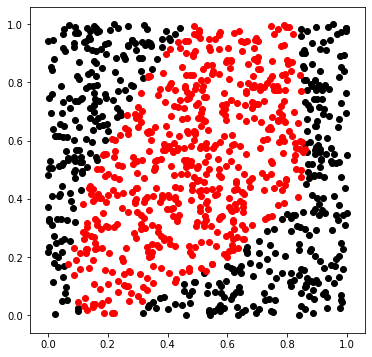

250 train_loss 285.88 test_error 14.50%


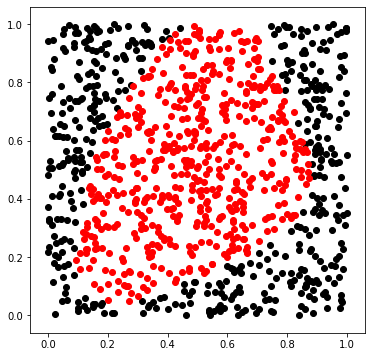

300 train_loss 235.22 test_error 10.30%


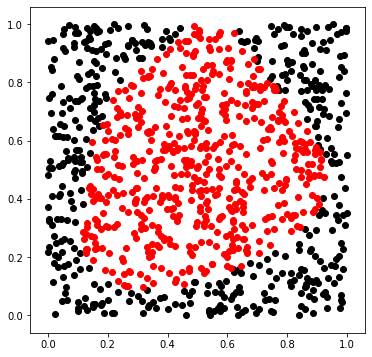

350 train_loss 200.25 test_error 7.50%


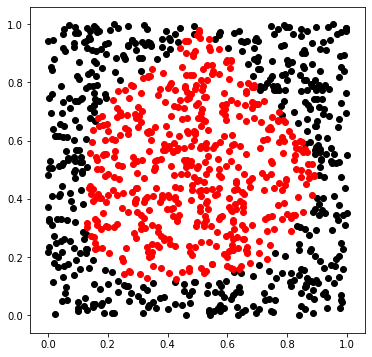

400 train_loss 183.20 test_error 6.10%


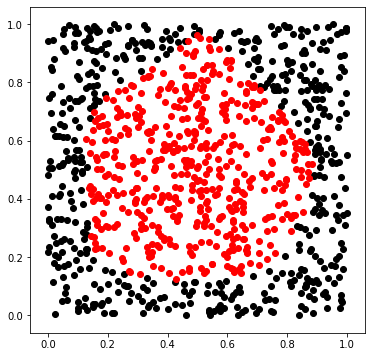

450 train_loss 171.80 test_error 6.40%


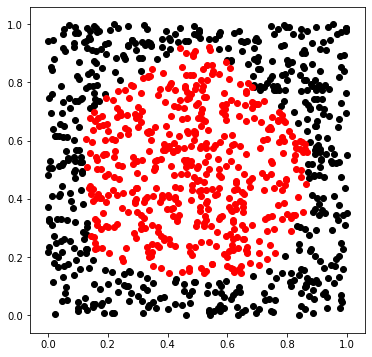

499 train_loss 166.37 test_error 5.50%


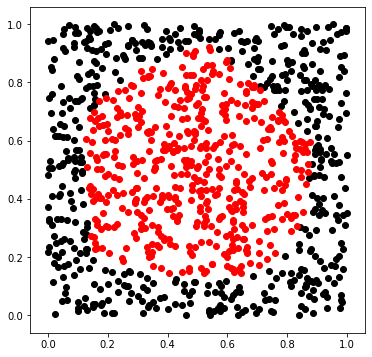

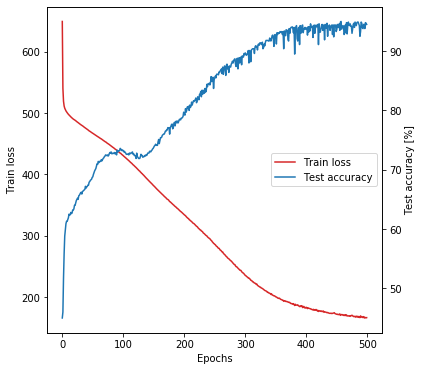

In [3]:
# Train 

nb_epochs = 500
mini_batch_size = 100

# Modules sequence
m1 = Modules.Linear(2,25)
m2 = Modules.Linear(25,25)
m3 = Modules.Linear(25,25)
m4 = Modules.Linear(25,2)

relu = Modules.ReLu()
tanh = Modules.Tanh() 

model = Sequential.Sequential(m1, relu, m2, relu, m3, tanh, m4, tanh)

# loss criterion
MSE = Modules.MSE()

losses = []
test_accs = []

for e in range(nb_epochs):
    
    # train
    sum_loss = 0
    for b in list(torch.utils.data.BatchSampler(torch.utils.data.RandomSampler(range(data.size(0))), batch_size=mini_batch_size, drop_last=False)):
        output = model(data[b])
        loss = MSE(output, target[b])
        model.zero_grad()
        model.backward(MSE.backward(output, target[b]))
        sgd = Optimizer.SGD(model.param(),eta=1e-4,wd=3e-5)
        sgd.step()
        sum_loss += loss.item()
    
    losses.append(sum_loss)
    
    # test
    sum_error = 0
    predicted_test_classes = []
    data_plot = []
    for t in list(torch.utils.data.BatchSampler(torch.utils.data.RandomSampler(range(data_test.size(0))), batch_size=mini_batch_size, drop_last=False)):
        test_out = model(data_test[t])
        predicted_test_batch_classes = test_out.max(1)[1]
        nb_errors = torch.where(target_test[t] != predicted_test_batch_classes)[0].size(0)
        
        # plot
        sum_error += nb_errors
        predicted_test_classes.append(predicted_test_batch_classes)
        data_plot.append(data_test[t])
    
    test_accs.append(100 - ((100 * sum_error) / data_test.size(0)))
    
    # plot
    predicted_test_classes = torch.cat(predicted_test_classes, dim=0)
    data_plot = torch.cat(data_plot, dim=0)
    
    if e%int((nb_epochs/10)) == 0 or e == nb_epochs-1:
        print('{:d} train_loss {:.02f} test_error {:.02f}%'.format(e, sum_loss, (100 * sum_error) / data_test.size(0)))
        plot_data(data_plot, predicted_test_classes)

        
# Train loss and test acc plot 
fig, ax1 = plt.subplots(figsize=(6,6))

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Train loss')
plt1 = ax1.plot(range(len(losses)), losses, color='tab:red', label='Train loss')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  
ax2.set_ylabel('Test accuracy [%]')  
plt2 = ax2.plot(range(len(test_accs)), test_accs, color='tab:blue', label='Test accuracy')
ax2.tick_params(axis='y')

plts = plt1+plt2
labs = [p.get_label() for p in plts]
plt.legend(plts, labs, loc='center right')
plt.show()

def train_model_SGD(model, criterion, 

                    train_input, train_target, test_input, test_target,
                    
                    mini_batch_size, nb_epochs, eta = 1e-4, wd = None, 
                    
                    momentum = False,
                    
                    plot_loss = False, plot_data = False):

0 train_loss 886.92 test_error 50.80%


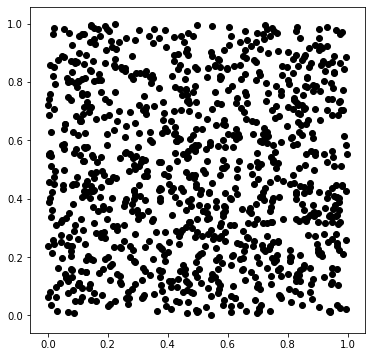

50 train_loss 476.05 test_error 26.40%


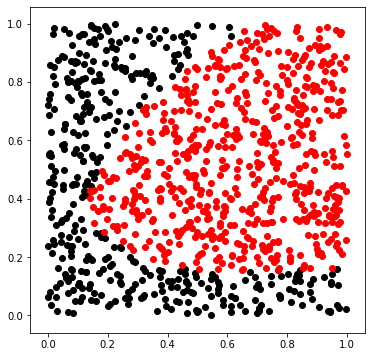

100 train_loss 443.72 test_error 22.20%


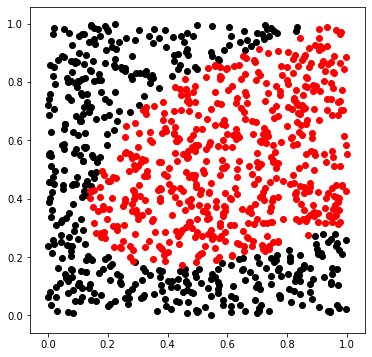

150 train_loss 396.03 test_error 17.70%


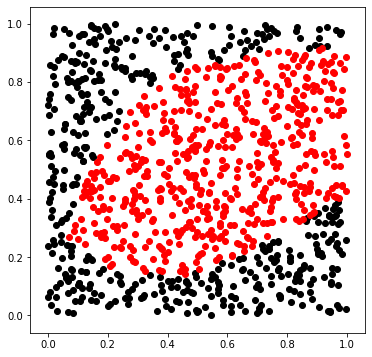

200 train_loss 332.00 test_error 13.30%


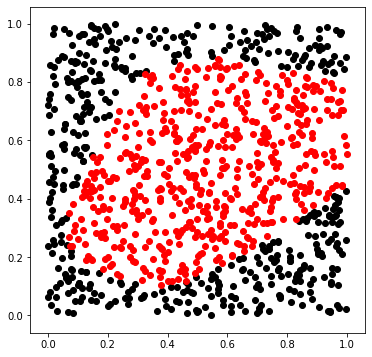

250 train_loss 271.06 test_error 8.90%


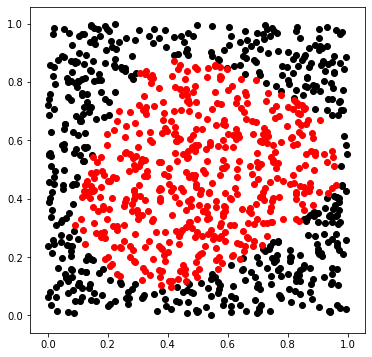

300 train_loss 226.81 test_error 6.10%


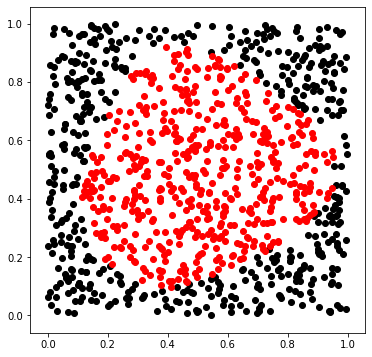

350 train_loss 203.42 test_error 5.10%


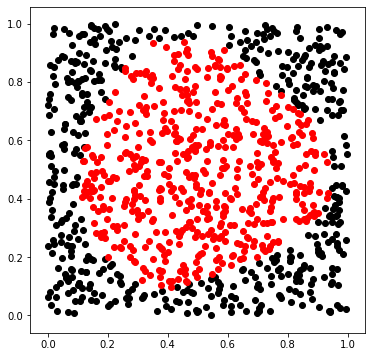

400 train_loss 194.26 test_error 7.60%


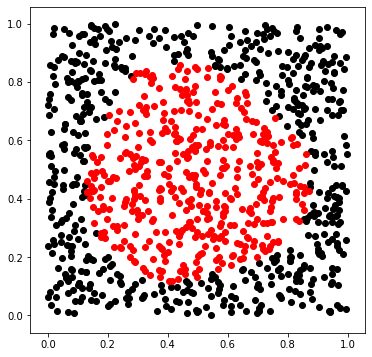

450 train_loss 186.61 test_error 4.20%


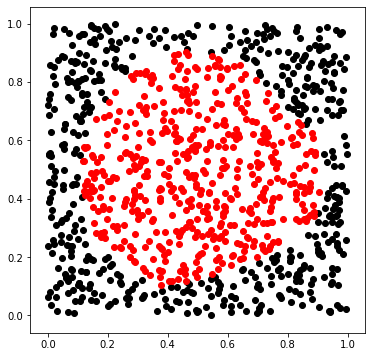

499 train_loss 180.78 test_error 4.00%


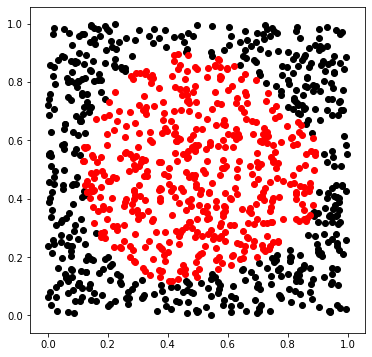

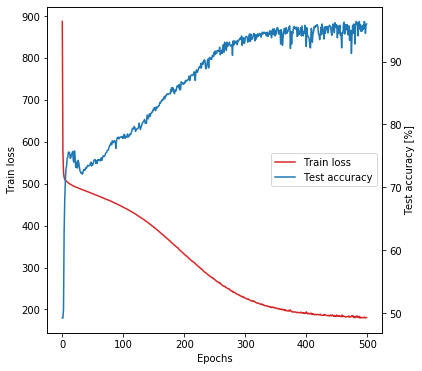

In [2]:
lr = 1e-4
wd = 3e-5
nb_epochs = 500
mini_batch_size = 100

# Modules sequence
m1 = Modules.Linear(2,25)
m2 = Modules.Linear(25,25)
m3 = Modules.Linear(25,25)
m4 = Modules.Linear(25,2)

relu = Modules.ReLu()
tanh = Modules.Tanh() 

model = Sequential.Sequential(m1, relu, m2, relu, m3, tanh, m4, tanh)

# loss criterion
criterion = Modules.MSE()

losses, test_accs = train_model_SGD(model, criterion,data,target,data_test,target_test,
                                   mini_batch_size,nb_epochs,eta = lr, wd=wd,
                                    plot_loss=True,plot_points=True)